In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('game data.csv')
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [39]:
df.drop('Days',axis=1,inplace=True)
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [5]:
x=df.drop('Wear Jacket?',axis=1)
y=df[['Wear Jacket?']]

In [6]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [7]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


# preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
x.Outlook=le.fit_transform(df['Outlook'])

In [11]:
x.head()

,Outlook,Temprature,Routine
0,1,Cold,Indoor
1,0,Cold,Indoor
2,0,Warm,Outdoor
3,1,Cold,Outdoor
4,0,Cold,Outdoor


In [12]:
x.Temprature=le.fit_transform(df['Temprature'])
x.head()

,Outlook,Temprature,Routine
0,1,0,Indoor
1,0,0,Indoor
2,0,1,Outdoor
3,1,0,Outdoor
4,0,0,Outdoor


In [13]:
x.Routine=le.fit_transform(df['Routine'])
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


Sunny-->1, Cloudy-->0;
Warm-->1, Cold--> 0 ;
Outdoor-->1 Indoor-->0


In [50]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=.25, random_state=1)

In [51]:
xtrain.head()

,Outlook,Temprature,Routine
1,0,0,0
6,0,1,0
0,1,0,0
4,0,0,1
3,1,0,1


In [52]:
xtest

,Outlook,Temprature,Routine
7,1,1,0
2,0,1,1


# DecisionTree

In [14]:
clf=DecisionTreeClassifier()

In [15]:
clf.fit(x,y) # sob solve

DecisionTreeClassifier()

In [16]:
 clf.predict([[1,0,0]]) # sunny=1 cold= 0 indoor =0

array(['No'], dtype=object)

In [17]:
 clf.predict([[0,0,1]]) # cloudy cold outdoor

array(['Yes'], dtype=object)

In [29]:
from sklearn import tree
from matplotlib import pyplot as plt

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

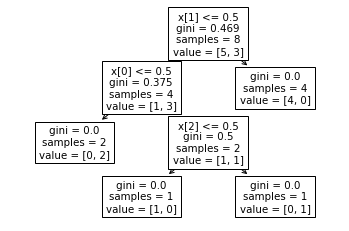

In [30]:
tree.plot_tree(clf)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

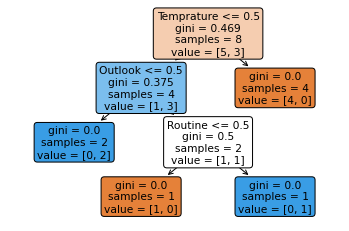

In [41]:
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns.tolist())

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

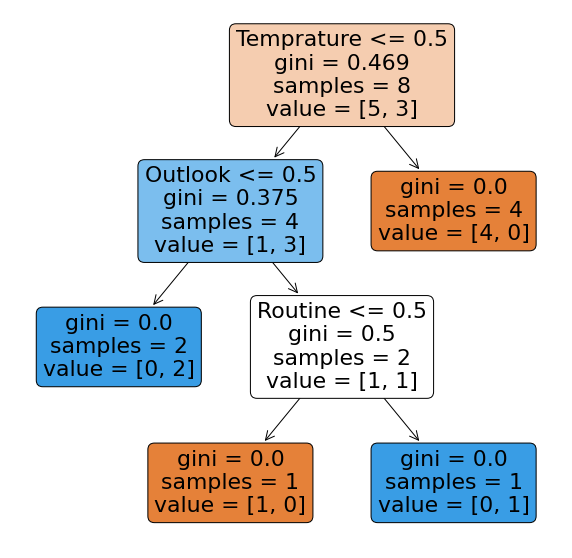

In [47]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns.tolist())

In [28]:
df.Temprature

0    Cold
1    Cold
2    Warm
3    Cold
4    Cold
5    Warm
6    Warm
7    Warm
Name: Temprature, dtype: object

In [48]:
text=tree.export_text(clf)
print(text)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: Yes
|   |--- feature_0 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: No
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: Yes
|--- feature_1 >  0.50
|   |--- class: No



# Accuracy test

In [53]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [56]:
clf.score(xtest,ytest) # it gives  1000 percent accuracy

1.0

# Performing Using Cross Validation Score

In [57]:
from sklearn.model_selection import cross_val_score 

In [60]:
result=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
result

array([0.5, 0.5, 1. , 1. , 1. ])

In [61]:
result.mean()  # it gives average 80 percent accuracy That means model is good

0.8